In [19]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# CoinGecko API endpoint (FREE – no API key needed)
url = "https://api.coingecko.com/api/v3/coins/markets"

# Query parameters (similar to CoinMarketCap)
parameters = {
    "vs_currency": "usd",          # convert prices to USD
    "order": "market_cap_desc",    # order by market cap
    "per_page": 15,                # limit = 15
    "page": 1,                     # start = 1
    "sparkline": "false"
}

# Headers (no API key required)
headers = {
    "Accept": "application/json"
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters, timeout=10)
    response.raise_for_status()   # raises error for 4xx/5xx
    data = response.json()        # directly converts JSON
    print(data)

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print("Request error:", e)
except Exception as e:
    print("Other error:", e)



[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 86822, 'market_cap': 1734298509508, 'market_cap_rank': 1, 'fully_diluted_valuation': 1734303113892, 'total_volume': 44934637126, 'high_24h': 87918, 'low_24h': 85620, 'price_change_24h': 1198.73, 'price_change_percentage_24h': 1.40001, 'market_cap_change_24h': 24775737833, 'market_cap_change_percentage_24h': 1.44928, 'circulating_supply': 19963109.0, 'total_supply': 19963162.0, 'max_supply': 21000000.0, 'ath': 126080, 'ath_change_percentage': -31.07336, 'ath_date': '2025-10-06T18:57:42.558Z', 'atl': 67.81, 'atl_change_percentage': 128057.96201, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2025-12-17T04:47:17.623Z'}, {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://coin-images.coingecko.com/coins/images/279/large/ethereum.png?1696501628', 'current_price': 2928.23, 'market_cap': 3

In [20]:
type(data)


list

In [21]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data)
df['timestamp'] = pd.to_datetime('now')
df


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage,timestamp
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,86822.000000,1734298509508,1,1734303113892,44934637126,87918.000000,85620.000000,1198.730000,1.40001,2.477574e+10,1.44928,1.996311e+07,1.996316e+07,2.100000e+07,126080.000000,-31.07336,2025-10-06T18:57:42.558Z,67.810000,1.280580e+05,2013-07-06T00:00:00.000Z,NaN,2025-12-17T04:47:17.623Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2928.230000,353608143055,2,353608143055,22831456349,2971.020000,2895.880000,32.350000,1.11701,2.551514e+09,0.72681,1.206951e+08,1.206951e+08,NaN,4946.050000,-40.77584,2025-08-24T19:21:03.333Z,0.432979,6.764355e+05,2015-10-20T00:00:00.000Z,NaN,2025-12-17T04:47:17.945Z,44.092239,btc,4409.223926,2025-12-17 10:18:54.678899
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999883,186301343961,3,191767545536,70251291056,1.000000,0.999784,-0.000019,-0.00186,-6.166487e+06,-0.00331,1.863264e+11,1.917933e+11,NaN,1.320000,-24.43104,2018-07-24T00:00:00.000Z,0.572521,7.463978e+01,2015-03-02T00:00:00.000Z,NaN,2025-12-17T04:47:11.578Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,859.280000,118356270639,4,118356265870,1908817594,876.310000,851.070000,7.290000,0.85574,9.815284e+08,0.83623,1.377354e+08,1.377354e+08,2.000000e+08,1369.990000,-37.22214,2025-10-13T08:41:24.131Z,0.039818,2.159873e+06,2017-10-19T00:00:00.000Z,NaN,2025-12-17T04:47:17.390Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
4,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.920000,116191477779,5,192054552501,2777129138,1.940000,1.860000,0.059200,3.18053,3.509333e+09,3.11436,6.049058e+10,9.998574e+10,1.000000e+11,3.650000,-47.30509,2025-07-18T03:40:53.808Z,0.002686,7.143045e+04,2014-05-22T00:00:00.000Z,NaN,2025-12-17T04:47:09.993Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
5,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999917,78255279075,6,78265972787,10921518808,1.001000,0.999364,0.000301,0.03007,-8.762217e+07,-0.11184,7.825788e+10,7.826858e+10,NaN,1.170000,-14.73567,2019-05-08T00:40:28.300Z,0.877647,1.392968e+01,2023-03-11T08:02:13.981Z,NaN,2025-12-17T04:47:12.181Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
6,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,127.640000,71761292218,7,78669752169,4345264278,129.470000,125.600000,1.930000,1.53805,1.103067e+09,1.56113,5.621903e+08,6.163124e+08,NaN,293.310000,-56.49257,2025-01-19T11:15:27.957Z,0.500801,2.538167e+04,2020-05-11T19:35:23.449Z,NaN,2025-12-17T04:47:10.564Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
7,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.279532,26467293368,8,26467412849,553054934,0.281812,0.278192,0.001164,0.41819,1.084822e+08,0.41156,9.468339e+10,9.468382e+10,NaN,0.431288,-35.14049,2024-12-04T00:10:40.323Z,0.001804,1.540325e+04,2017-11-12T00:00:00.000Z,NaN,2025-12-17T04:47:11.617Z,146.122301,usd,14612.230070,2025-12-17 10:18:54.678899
8,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,2928.510000,25691458787,9,25691458787,41337185,2962.690000,2898.850000,18.670000,0.64177,1.817681e+08,0.71255,8.767644e+06,8.767644e+06,NaN,4932.890000,-40.62306,2025-08-24T19:21:31.902Z,482.900000,5.065489e+02,2020-12-22T04:08:21.854Z,NaN,2025-12-17T04:47:10.597Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
9,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.130840,19912984920,10,19914859769,955056266,0.132664,0.128267,0.002574,2.00642,3.567564e+08,1.82426,1.522005e+11,1.

In [24]:

def api_runner():
 global df
 url = "https://api.coingecko.com/api/v3/coins/markets"

 parameters = {
    "vs_currency": "usd",          # convert prices to USD
    "order": "market_cap_desc",    # order by market cap
    "per_page": 15,                # limit = 15
    "page": 1,                     # start = 1
    "sparkline": "false"
 }

 headers = {
    "Accept": "application/json"
 }

 session = Session()
 session.headers.update(headers)

 try:
    response = session.get(url, params=parameters, timeout=10)
    response.raise_for_status()   
    data = response.json()    

 except (ConnectionError, Timeout, TooManyRedirects) as e:
    print("Request error:", e)
 except Exception as e:
    print("Other error:", e)
#USE THIS TO append data to df
 df2 = pd.json_normalize(data)
 df2['timestamp'] = pd.to_datetime('now')
 df = pd.concat([df, df2], ignore_index=True)
  #USE This if we want to create a csv and append data to it  
     #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
 #if not os.path.isfile(r'C:\Users\sheni\OneDrive\Documents\Data Analyst\API.csv'):
    # df.to_csv(r'C:\Users\sheni\OneDrive\Documents\Data Analyst\API.csv',header='column_names')
 #else:
    # df.to_csv(r'C:\Users\sheni\OneDrive\Documents\Data Analyst\API.csv',mode='a',header=False)
 


In [25]:
import os 
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print("API runner completed successfully")
    sleep(60)#sleep for 1 min
exit()

API runner completed successfully


KeyboardInterrupt: 

In [26]:
df
#pd.read_csv(csv create twraga twramadi)
#df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
#df72


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage,timestamp
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,86822.000000,1734298509508,1,1734303113892,44934637126,87918.000000,85620.000000,1198.730000,1.40001,2.477574e+10,1.44928,1.996311e+07,1.996316e+07,2.100000e+07,126080.000000,-31.07336,2025-10-06T18:57:42.558Z,67.810000,1.280580e+05,2013-07-06T00:00:00.000Z,NaN,2025-12-17T04:47:17.623Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2928.230000,353608143055,2,353608143055,22831456349,2971.020000,2895.880000,32.350000,1.11701,2.551514e+09,0.72681,1.206951e+08,1.206951e+08,NaN,4946.050000,-40.77584,2025-08-24T19:21:03.333Z,0.432979,6.764355e+05,2015-10-20T00:00:00.000Z,NaN,2025-12-17T04:47:17.945Z,44.092239,btc,4409.223926,2025-12-17 10:18:54.678899
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999883,186301343961,3,191767545536,70251291056,1.000000,0.999784,-0.000019,-0.00186,-6.166487e+06,-0.00331,1.863264e+11,1.917933e+11,NaN,1.320000,-24.43104,2018-07-24T00:00:00.000Z,0.572521,7.463978e+01,2015-03-02T00:00:00.000Z,NaN,2025-12-17T04:47:11.578Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,859.280000,118356270639,4,118356265870,1908817594,876.310000,851.070000,7.290000,0.85574,9.815284e+08,0.83623,1.377354e+08,1.377354e+08,2.000000e+08,1369.990000,-37.22214,2025-10-13T08:41:24.131Z,0.039818,2.159873e+06,2017-10-19T00:00:00.000Z,NaN,2025-12-17T04:47:17.390Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
4,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.920000,116191477779,5,192054552501,2777129138,1.940000,1.860000,0.059200,3.18053,3.509333e+09,3.11436,6.049058e+10,9.998574e+10,1.000000e+11,3.650000,-47.30509,2025-07-18T03:40:53.808Z,0.002686,7.143045e+04,2014-05-22T00:00:00.000Z,NaN,2025-12-17T04:47:09.993Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
5,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999917,78255279075,6,78265972787,10921518808,1.001000,0.999364,0.000301,0.03007,-8.762217e+07,-0.11184,7.825788e+10,7.826858e+10,NaN,1.170000,-14.73567,2019-05-08T00:40:28.300Z,0.877647,1.392968e+01,2023-03-11T08:02:13.981Z,NaN,2025-12-17T04:47:12.181Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
6,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,127.640000,71761292218,7,78669752169,4345264278,129.470000,125.600000,1.930000,1.53805,1.103067e+09,1.56113,5.621903e+08,6.163124e+08,NaN,293.310000,-56.49257,2025-01-19T11:15:27.957Z,0.500801,2.538167e+04,2020-05-11T19:35:23.449Z,NaN,2025-12-17T04:47:10.564Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
7,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.279532,26467293368,8,26467412849,553054934,0.281812,0.278192,0.001164,0.41819,1.084822e+08,0.41156,9.468339e+10,9.468382e+10,NaN,0.431288,-35.14049,2024-12-04T00:10:40.323Z,0.001804,1.540325e+04,2017-11-12T00:00:00.000Z,NaN,2025-12-17T04:47:11.617Z,146.122301,usd,14612.230070,2025-12-17 10:18:54.678899
8,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,2928.510000,25691458787,9,25691458787,41337185,2962.690000,2898.850000,18.670000,0.64177,1.817681e+08,0.71255,8.767644e+06,8.767644e+06,NaN,4932.890000,-40.62306,2025-08-24T19:21:31.902Z,482.900000,5.065489e+02,2020-12-22T04:08:21.854Z,NaN,2025-12-17T04:47:10.597Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
9,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.130840,19912984920,10,19914859769,955056266,0.132664,0.128267,0.002574,2.00642,3.567564e+08,1.82426,1.522005e+11,1.

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [28]:
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage,timestamp
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,86822.00000,1734298509508,1,1734303113892,44934637126,87918.00000,85620.00000,1198.73000,1.40001,24775737833.00000,1.44928,19963109.00000,19963162.00000,21000000.00000,126080.00000,-31.07336,2025-10-06T18:57:42.558Z,67.81000,128057.96201,2013-07-06T00:00:00.000Z,NaN,2025-12-17T04:47:17.623Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2928.23000,353608143055,2,353608143055,22831456349,2971.02000,2895.88000,32.35000,1.11701,2551513621.00000,0.72681,120695076.68904,120695076.68904,NaN,4946.05000,-40.77584,2025-08-24T19:21:03.333Z,0.43298,676435.53446,2015-10-20T00:00:00.000Z,NaN,2025-12-17T04:47:17.945Z,44.09224,btc,4409.22393,2025-12-17 10:18:54.678899
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.99988,186301343961,3,191767545536,70251291056,1.00000,0.99978,-0.00002,-0.00186,-6166487.25763,-0.00331,186326391951.46381,191793328450.54620,NaN,1.32000,-24.43104,2018-07-24T00:00:00.000Z,0.57252,74.63978,2015-03-02T00:00:00.000Z,NaN,2025-12-17T04:47:11.578Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,859.28000,118356270639,4,118356265870,1908817594,876.31000,851.07000,7.29000,0.85574,981528435.00000,0.83623,137735389.91000,137735384.36000,200000000.00000,1369.99000,-37.22214,2025-10-13T08:41:24.131Z,0.03982,2159872.83540,2017-10-19T00:00:00.000Z,NaN,2025-12-17T04:47:17.390Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
4,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.92000,116191477779,5,192054552501,2777129138,1.94000,1.86000,0.05920,3.18053,3509332853.00000,3.11436,60490580859.00000,99985744733.00000,100000000000.00000,3.65000,-47.30509,2025-07-18T03:40:53.808Z,0.00269,71430.44975,2014-05-22T00:00:00.000Z,NaN,2025-12-17T04:47:09.993Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
5,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.99992,78255279075,6,78265972787,10921518808,1.00100,0.99936,0.00030,0.03007,-87622172.05156,-0.11184,78257884094.75922,78268578162.53743,NaN,1.17000,-14.73567,2019-05-08T00:40:28.300Z,0.87765,13.92968,2023-03-11T08:02:13.981Z,NaN,2025-12-17T04:47:12.181Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
6,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,127.64000,71761292218,7,78669752169,4345264278,129.47000,125.60000,1.93000,1.53805,1103066882.00000,1.56113,562190319.39332,616312384.17908,NaN,293.31000,-56.49257,2025-01-19T11:15:27.957Z,0.50080,25381.66553,2020-05-11T19:35:23.449Z,NaN,2025-12-17T04:47:10.564Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
7,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.27953,26467293368,8,26467412849,553054934,0.28181,0.27819,0.00116,0.41819,108482178.00000,0.41156,94683391395.26479,94683818823.49438,NaN,0.43129,-35.14049,2024-12-04T00:10:40.323Z,0.00180,15403.24567,2017-11-12T00:00:00.000Z,NaN,2025-12-17T04:47:11.617Z,146.12230,usd,14612.23007,2025-12-17 10:18:54.678899
8,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,2928.51000,25691458787,9,25691458787,41337185,2962.69000,2898.85000,18.67000,0.64177,181768068.00000,0.71255,8767644.01241,8767644.01241,NaN,4932.89000,-40.62306,2025-08-24T19:21:31.902Z,482.90000,506.54887,2020-12-22T04:08:21.854Z,NaN,2025-12-17T04:47:10.597Z,NaN,NaN,NaN,2025-12-17 10:18:54.678899
9,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.13084,19912984920,10,19914859769,955056266,0.13266,0.12827,0.00257,2.00642,35675

In [29]:
df3=df.groupby('name',sort=False)[['price_change_percentage_24h','market_cap_change_percentage_24h']].mean()
df3

,price_change_percentage_24h,market_cap_change_percentage_24h
name,,
Bitcoin,1.39666,1.44928
Ethereum,1.15454,0.72681
Tether,-0.00270,-0.00331
BNB,0.85353,0.83623
XRP,3.17701,3.11436
USDC,0.02846,-0.11184
Solana,1.59469,1.56113
TRON,0.41243,0.41156
Lido Staked Ether,0.65846,0.71255


In [30]:
df4=df3.stack()
df4

name                                               
Bitcoin            price_change_percentage_24h         1.39666
                   market_cap_change_percentage_24h    1.44928
Ethereum           price_change_percentage_24h         1.15454
                   market_cap_change_percentage_24h    0.72681
Tether             price_change_percentage_24h        -0.00270
                   market_cap_change_percentage_24h   -0.00331
BNB                price_change_percentage_24h         0.85353
                   market_cap_change_percentage_24h    0.83623
XRP                price_change_percentage_24h         3.17701
                   market_cap_change_percentage_24h    3.11436
USDC               price_change_percentage_24h         0.02846
                   market_cap_change_percentage_24h   -0.11184
Solana             price_change_percentage_24h         1.59469
                   market_cap_change_percentage_24h    1.56113
TRON               price_change_percentage_24h         0.41243
   

In [32]:
type(df4)

pandas.core.series.Series

In [33]:
df5=df4.to_frame(name='values')
df5

values
name                                                       
Bitcoin           price_change_percentage_24h       1.39666
                  market_cap_change_percentage_24h  1.44928
Ethereum          price_change_percentage_24h       1.15454
                  market_cap_change_percentage_24h  0.72681
Tether            price_change_percentage_24h      -0.00270
                  market_cap_change_percentage_24h -0.00331
BNB               price_change_percentage_24h       0.85353
                  market_cap_change_percentage_24h  0.83623
XRP               price_change_percentage_24h       3.17701
                  market_cap_change_percentage_24h  3.11436
USDC              price_change_percentage_24h       0.02846
                  market_cap_change_percentage_24h -0.11184
Solana            price_change_percentage_24h       1.59469
                  market_cap_change_percentage_24h  1.56113
TRON              price_change_percentage_24h       0.41243
                  market_cap_change_percentage_24h  0.41156
Lido Staked Ether price_change_percentage_24h       0.65846
                  market_cap_change_percentage_24h  0.71255
Dogecoin          price_change_percentage_24h       2.01753
                  market_cap_change_percentage_24h  1.82426
Figure Heloc      price_change_percentage_24h       0.16028
                  market_cap_change_percentage_24h  0.54059
Cardano           price_change_percentage_24h      -0.06978
                  market_cap_change_percentage_24h -0.00881
WhiteBIT Coin     price_change_percentage_24h      -0.03952
                  market_cap_change_percentage_24h  0.07125
Wrapped stETH     price_change_percentage_24h       1.26648
                  market_cap_change_percentage_24h  0.74252
Bitcoin Cash      price_change_percentage_24h       2.97263
                  market_cap_change_percentage_24h  2.87929

In [37]:
index=pd.Index(range(30))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,price_change_percentage_24h,1.39666
1,Bitcoin,market_cap_change_percentage_24h,1.44928
2,Ethereum,price_change_percentage_24h,1.15454
3,Ethereum,market_cap_change_percentage_24h,0.72681
4,Tether,price_change_percentage_24h,-0.00270
5,Tether,market_cap_change_percentage_24h,-0.00331
6,BNB,price_change_percentage_24h,0.85353
7,BNB,market_cap_change_percentage_24h,0.83623
8,XRP,price_change_percentage_24h,3.17701
9,XRP,market_cap_change_percentage_24h,3.11436


In [35]:
df5.count()

values    30
dtype: int64

In [47]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,price_change_percentage_24h,1.39666
1,Bitcoin,market_cap_change_percentage_24h,1.44928
2,Ethereum,price_change_percentage_24h,1.15454
3,Ethereum,market_cap_change_percentage_24h,0.72681
4,Tether,price_change_percentage_24h,-0.00270
5,Tether,market_cap_change_percentage_24h,-0.00331
6,BNB,price_change_percentage_24h,0.85353
7,BNB,market_cap_change_percentage_24h,0.83623
8,XRP,price_change_percentage_24h,3.17701
9,XRP,market_cap_change_percentage_24h,3.11436


In [48]:
df7

,name,percent_change,values
0,Bitcoin,price_change_percentage_24h,1.39666
1,Bitcoin,market_cap_change_percentage_24h,1.44928
2,Ethereum,price_change_percentage_24h,1.15454
3,Ethereum,market_cap_change_percentage_24h,0.72681
4,Tether,price_change_percentage_24h,-0.00270
5,Tether,market_cap_change_percentage_24h,-0.00331
6,BNB,price_change_percentage_24h,0.85353
7,BNB,market_cap_change_percentage_24h,0.83623
8,XRP,price_change_percentage_24h,3.17701
9,XRP,market_cap_change_percentage_24h,3.11436


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df7['percent_change'] = df7['percent_change'].replace(['price_change_percentage_24h','market_cap_change_percentage_24h'],['price(24h)','market_cap(24 h)'])
df7

,name,percent_change,values
0,Bitcoin,price(24h),1.39666
1,Bitcoin,market_cap(24 h),1.44928
2,Ethereum,price(24h),1.15454
3,Ethereum,market_cap(24 h),0.72681
4,Tether,price(24h),-0.00270
5,Tether,market_cap(24 h),-0.00331
6,BNB,price(24h),0.85353
7,BNB,market_cap(24 h),0.83623
8,XRP,price(24h),3.17701
9,XRP,market_cap(24 h),3.11436


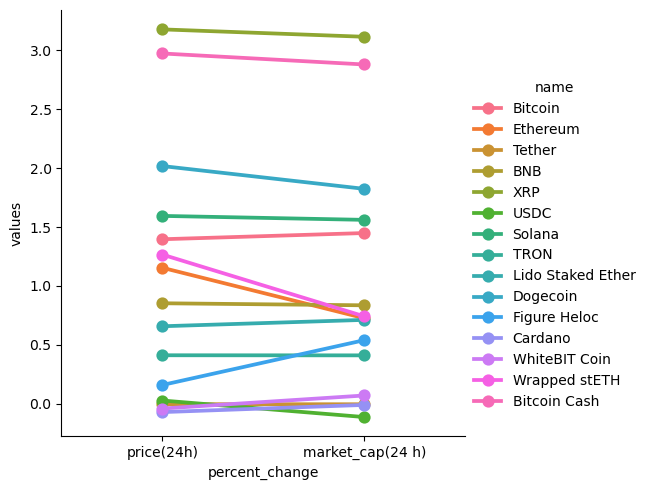

In [51]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [52]:

# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','current_price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,current_price,timestamp
0,Bitcoin,86822.00000,2025-12-17 10:18:54.678899
15,Bitcoin,86816.00000,2025-12-17 10:20:27.703087


<Axes: xlabel='timestamp', ylabel='current_price'>

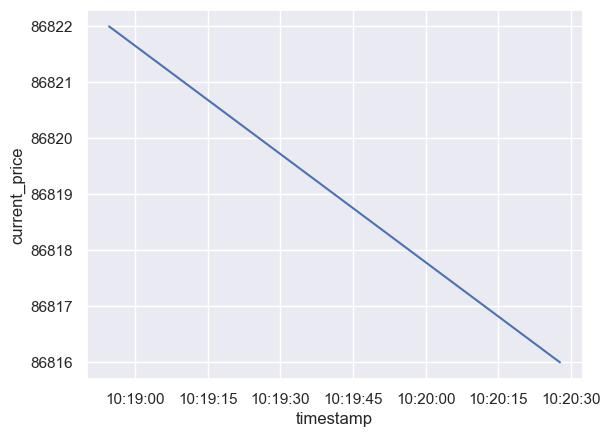

In [53]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='current_price', data = df10)